In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
df = pd.read_json('C:/Users/Gayathri/Desktop/logins.json')

In [216]:
df.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


**Part 1 ‐ Exploratory data analysis** <br/>
The logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [218]:
df.isnull().sum()

login_time    0
dtype: int64

In [244]:
df.shape

(93142, 1)

**Downsample the series into 15 minute bins**

In [255]:
df_logtime = df.resample('15min', on='login_time').count()

In [256]:
df_logtime.rename(columns={'login_time':'login_count'}, inplace=True)

In [257]:
df_logtime.shape

(9788, 1)

In [258]:
df_temp = df_logtime.copy()

In [260]:
df_logtime.reset_index(inplace=True)

In [261]:
df_logtime['hours'] = df_logtime['login_time'].dt.strftime("%H:%M")


In [262]:
df_logtime['hours'] = df_logtime['login_time'].dt.strftime("%H:%M")

In [267]:
df_logtime.head(4)

,login_time,login_count,hours
0,1970-01-01 20:00:00,2,20:00
1,1970-01-01 20:15:00,6,20:15
2,1970-01-01 20:30:00,9,20:30
3,1970-01-01 20:45:00,7,20:45


In [268]:
df_logday = df_logtime.copy()

In [269]:
# Adding the days of the week

days = {0:'Mon', 1:'Tue', 2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_logday['day_of_week'] = df_logtime['login_time'].dt.dayofweek.map(days)

In [299]:
df_logday.head(20)

,login_time,login_count,hours,day_of_week
0,1970-01-01 20:00:00,2,20:00,Thu
1,1970-01-01 20:15:00,6,20:15,Thu
2,1970-01-01 20:30:00,9,20:30,Thu
3,1970-01-01 20:45:00,7,20:45,Thu
4,1970-01-01 21:00:00,1,21:00,Thu
5,1970-01-01 21:15:00,4,21:15,Thu
6,1970-01-01 21:30:00,0,21:30,Thu
7,1970-01-01 21:45:00,4,21:45,Thu
8,1970-01-01 22:00:00,9,22:00,Thu
9,1970-01-01 22:15:00,8,22:15,Thu


**Visualizing the aggregated logins in 15mins time interval**

Text(0, 0.5, 'Count')

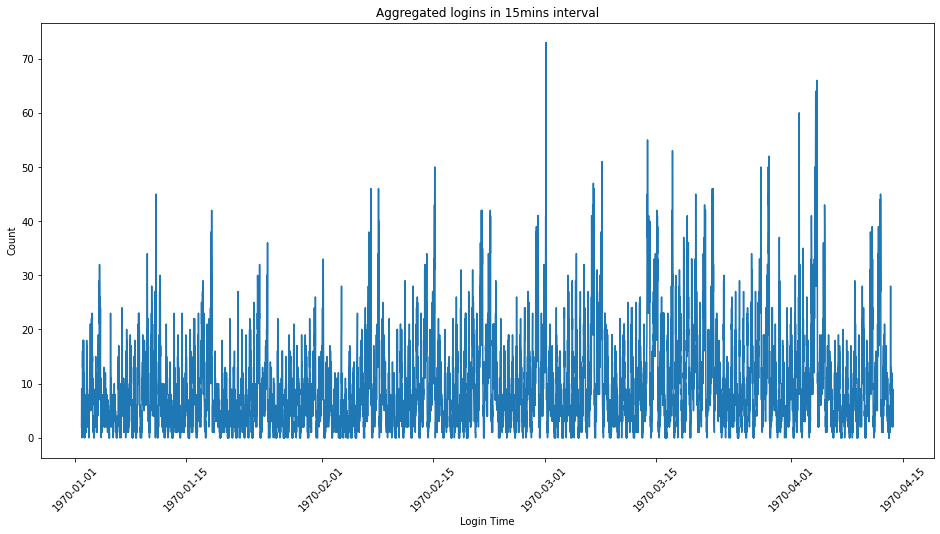

In [274]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='login_time', 
             y='login_count', 
             data=df_logtime)
plt.xticks(rotation=45)
plt.title('Aggregated logins in 15mins interval')
plt.xlabel('Login Time')
plt.ylabel('Count')


**Grouping the login count by weekdays**

In [271]:
daily_log = df_logday.groupby('day_of_week')['login_count'].count()


In [272]:
daily_log.sort_values(inplace=True)

In [289]:
daily_log

day_of_week
Tue    1344
Wed    1344
Thu    1360
Mon    1420
Fri    1440
Sat    1440
Sun    1440
Name: login_count, dtype: int64

Friday has the maximum number of login count and wednday has the lowest count.

<AxesSubplot:xlabel='day_of_week'>

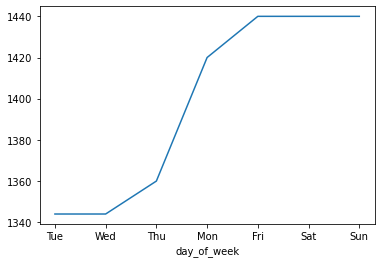

In [273]:
daily_log.plot()

In [282]:
from matplotlib.ticker import MaxNLocator

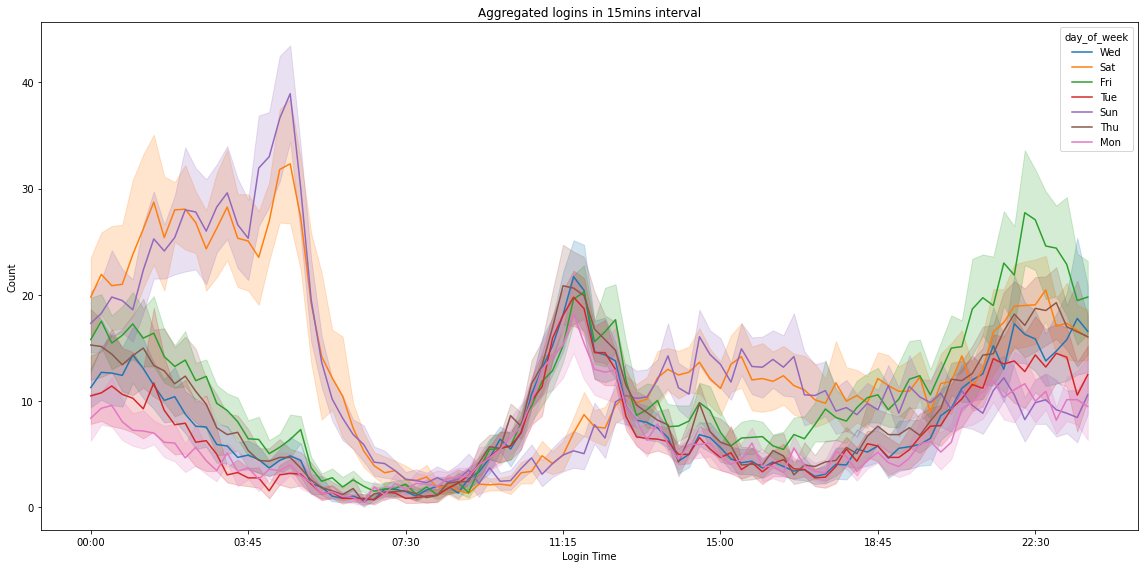

In [283]:

plt.figure(figsize=(16, 8))
sns.lineplot(x='hours', 
             y='login_count', 
             data=df_logday.sort_values(by='hours'),hue='day_of_week')


plt.gca().xaxis.set_major_locator(MaxNLocator(prune = 'lower'))

plt.title('Aggregated logins in 15mins interval')
plt.xlabel('Login Time')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

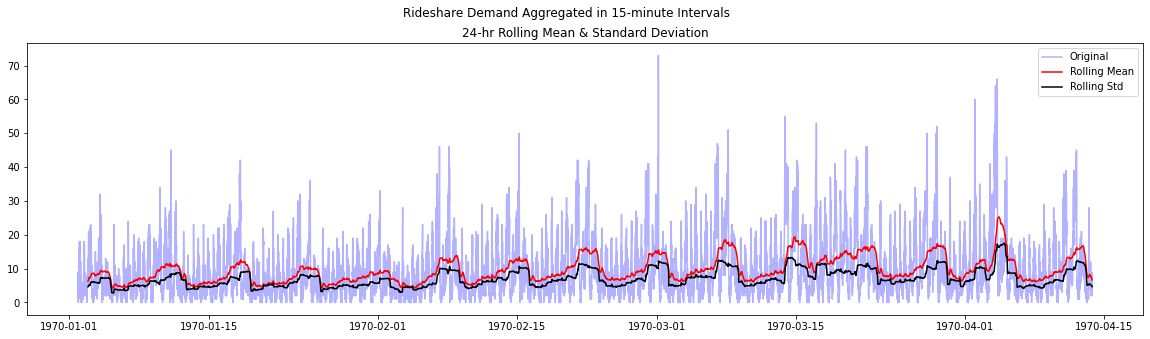

In [304]:


rolling_mean = df_temp.rolling(window=100).mean()
rolling_std = df_temp.rolling(window=100).std()
fig = plt.figure(figsize=(20,5))
orig = plt.plot(df_temp, color='blue',label='Original', alpha=0.3)
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.suptitle('Rideshare Demand Aggregated in 15-minute Intervals')
plt.title('24-hr Rolling Mean & Standard Deviation')
plt.show()

The above plot shows there is some change in the mean and standard deviation with 24 hours rollindg window

In [284]:
y = df_logtime.set_index('login_time')['login_count']
y

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Name: login_count, Length: 9788, dtype: int64

In [290]:
y.describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
Name: login_count, dtype: float64

<Figure size 432x288 with 0 Axes>

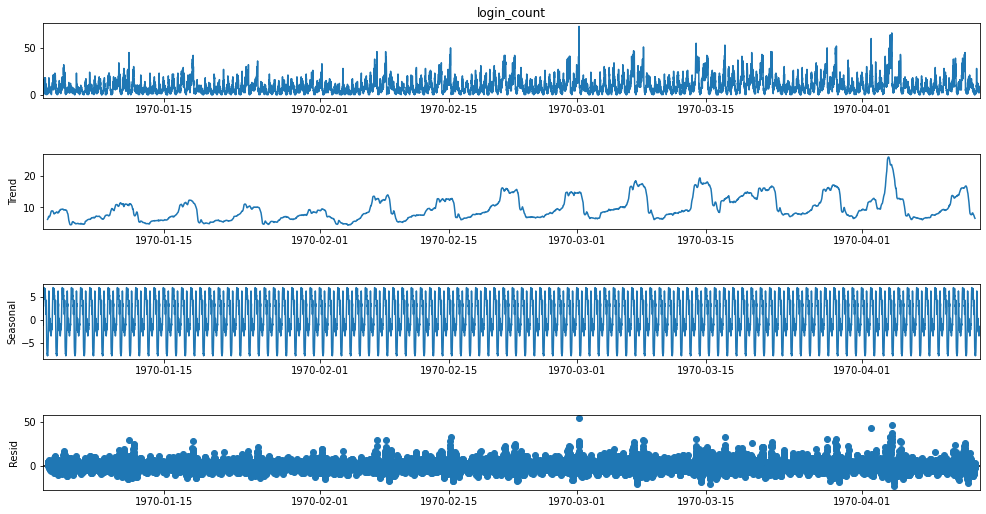

In [285]:
from statsmodels.tsa.seasonal import seasonal_decompose

period = 24*60//15
decomposition = seasonal_decompose(y,period=period,model='additive')


# Plot the original data, the trend, the seasonality, and the residuals 
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)


1. **Trend**: The overall direction that the data is travelling in (like upward or downwards) -There was no absorbed trend 
2. **Seasonality**: Cyclical patterns in the data - There was no cyclical patterns
3. **Noise**: The random variation in the data

**Agumented dickey fuller test** 

In [286]:
from statsmodels.tsa.stattools import adfuller
import math

results = adfuller(df_logtime['login_count'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(-10.33795430906043, 2.7323966542232607e-18, 38, 9749, {'1%': -3.431020942932955, '5%': -2.8618365160244372, '10%': -2.5669278303551253}, 56368.34584451129)
The p-value of the test on prices is: 2.7323966542232607e-18


The p-value is extremely small, so we can easily reject the null hypothesis that login count is not a random walk.

## Conclusion

There slight variation in average number of users over the time period being examined, there is no significant increase in demand over the course of this time series and it can be considered to have a stationary mean. From the adfuller test, this time series is not a random walk.

There is a weekly cycle and activity that spikes on Saturdays and sundays.

In the weekends there is a significant spike in the early hours of the morning, almost no activity throughout the morning, and above-average activity from noon onwards.

There is minor spike in activity in the week hours of the morning, however there is a larger spike in activity from 11 AM - Noon, and and aditional spike in the late evening before midnight.